# Functions Describing Distributions
## Cumulative Probabilities
- Consider first the CDF(**Cumulative Distribution Function**) of a random variable $X$, definded as
$$
F(x) := \mathbb{P}(X\le x)
$$
  - Where $X$ can be discrete, continuous or a more genral random variable. The CDF is a very popular descriptor because unlike the PMF and PDF, it is not restricted to just the discrete or continuous case. A closely related funciton is CCDF(**Complement Culmutive Distribution Funciton**) $\bar{F}(x) = 1-F(x) = \mathbb{P}(X>x)$
  - From the definition of the CDF,
$$
\lim_{x\to -\infty}F(x)=0 \quad \text{and}\quad \lim_{x\to \infty}F(x)=1
$$
  - Furthermore, $F(\cdot)$ is a non-decreasing funciton. Any function with these properties constitutes a valid CDF and hence a probability distribution of a random variable.
  - In the case of a continuous random variable, the PDF $f(\cdot)$ and the CDF $F(\cdot)$ are related via
$$
f(X) = \frac{dF(x)}{dx} \quad \text{and}\quad F(x) = \int_{-\infty}^{x}f(u)du
$$
  - Since CDF is non-decreasing funciton and $\displaystyle{\lim_{x\to \infty}F(x)=1}$
$$
f(x) \ge 0 \quad \text{and} \quad \int_{-\infty}^{\infty}f(x)dx = 1
$$
  - In the case of discrete random variable, the PMF $p(\cdot)$ is related to the CDF via
$$
p(x) = F(x) - \lim_{t\to x^{-}}F(t) \quad \text{and}\quad F(x) = \sum_{k\le x}p(k)
$$
- In this Julia code, we look at an elementary example, where we consider the PDF $f_{2}(x) = \left\{\begin{array}{ll} x + 1 & \text{for }x\in[-1,0],\\ 1 - x & \text{for }x\in(0,1].\end{array}\right.$ and integrate it via a crude *Riemann sum* to obtain the CDF:
$$
F(x) = \mathbb{P}(X\le x) = \int_{-\infty}^{x}f_{2}(u)du \approx \sum_{u=-\infty}^{x}f_{2}(u)\Delta u
$$

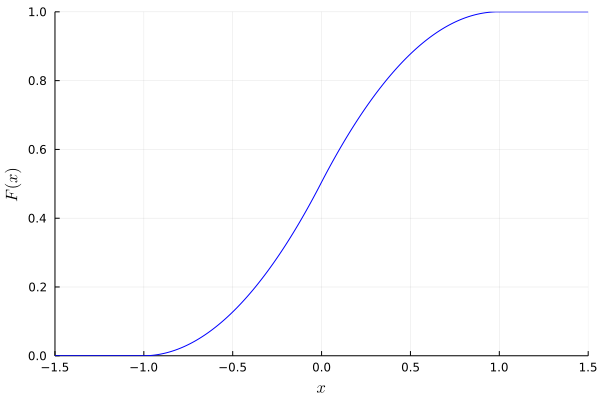

In [1]:
using Plots, LaTeXStrings;

f2(x) = (x<0 ? x+1 : 1-x) * (abs(x)<1 ? 1 : 0)
a, b = -1.5, 1.5
delta = 0.01

F(x) = sum([f2(u)*delta for u in a:delta:x])

xGrid = a:delta:b
y = [F(u) for u in xGrid]
plot(xGrid, y, c=:blue, xlims=(a,b), ylims=(0,1),
 xlabel=L"x", ylabel=L"F(x)", legend=:none)

### Rieman Sum
$$
F(x) = \mathbb{P}(X\le x) = \int_{-\infty}^{x}f_{2}(u)du \approx \sum_{u=-\infty}^{x}f_{2}(u)\Delta u
$$

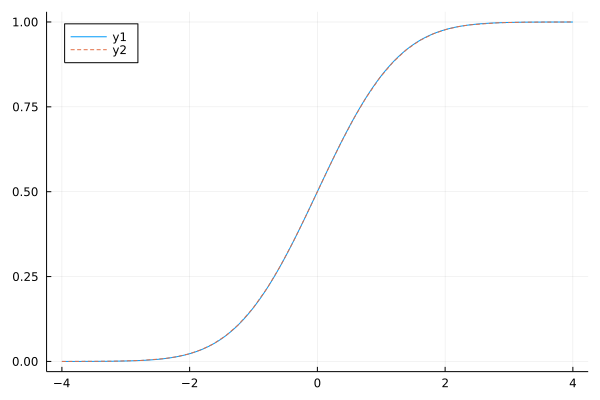

In [2]:
function RiemannSum(range::Array, pdf::Function, delta=0.001::Float64)
    F(x) = sum([pdf(u)*delta for u in range[1]:delta:x])
    return F
end


# Test
using Distributions
f(x) = pdf(Normal(),x)
xGrid = collect(-4:0.001:4)
plot(xGrid,RiemannSum([-4,4],f).(xGrid))
plot!(x -> cdf(Normal(),x),line=:dash,legend=:topleft)

## Inverse and Quantiles
- Where the CDF answers the question "what is the probability of being less than or equal to $x$", a dual question often asked is "what value of $x$ corresponds to a probability of the random variable being less than or equal to $u$". This is the ***inverse function*** of $F(x)$. 
$$
F(F^{-1}(u)) = u, \quad \text{for } u \in [0,1].
$$
  - For example, take the ***sigmoid function*** as the CDF, which is as a type of ***logistic funciton***
$$
F(x) = \frac{1}{1+e^{-x}}
$$
  - Solving for $F^{-1}(u)$ yields
$$
F^{-1}(u) = \ln\bigg(\frac{u}{1-u}\bigg)
$$
    - Solving process
$$
\begin{array}{ll}
\because & F(F^{-1}(u)) = u \text{ and } F(x) = \frac{1}{1+e^{-x}} \\
\therefore & F(F^{-1}(u)) = \frac{1}{1+e^{-F^{-1}(u)}} = u \\
& e^{-F^{-1}(u)} = \frac{1}{u} - 1 = \frac{1-u}{u}\\
& e^{F^{-1}(u)} = \frac{u}{1-u} \\
& \ln e^{F^{-1}(u)} = F^{-1}(u) = \ln \big(\frac{u}{1-u}\big) \\
\therefore & F^{-1}(u) = \ln \big(\frac{u}{1-u}\big) \\
\end{array}
$$
  - As $u\to 0^{+}$ we get $F^{-1}(u) \to -\infty$, while $u\to 1^{-}$ we get $F^{-1}(u)\to \infty$. This is the ***inverse CDF*** for the distribution. Schemeatically, given a specified probability $u$, it allows us to find $x$ value such that
$$
\mathbb{P}(X\le x) = u
$$
  - The value $x$ satisfying is also called the $u$-th ***quantile*** of the distribution. If $u$ is given as a percent, then it is called a ***percentile***. 
    - The ***median*** is another related term, and is also known as the $0.5$-th quantile.  
    - The ***quartiles*** is also a related term, with the ***first quartile*** at $\mu=0.25$, the ***third quartile*** at $\mu=0.75$, and the ***inter-quartile range***, which is defined as $F^{-1}(0.75) - F^{-1}(0.25)$
  - In more general cases, where CDF is not necessarily strictly increasing and continuous, we may still define the inverse CDF via ($\inf\{A\}$ is the ***infimum***, which is the least elements of $A$)
$$
F^{-1}(u) = \inf\{x : F(x) \ge\mu\}
$$
- ***Example*** Consider an arbitrary customer arriving to a queue where the server is utilized 80% of time, and an average service takes 1 minute. How long does such a customer wait in the queue until service starts? Some customers won't wait at all (20% of the customers), whereas others will need to wait until those arrive before them are serviced. Results from the field of ***queuing theory*** give rise to the following distribution function for the waiting time:
$$
F(x) = 1 - 0.8e^{-(1-0.8)x} \quad \text{for }x\ge 0
$$


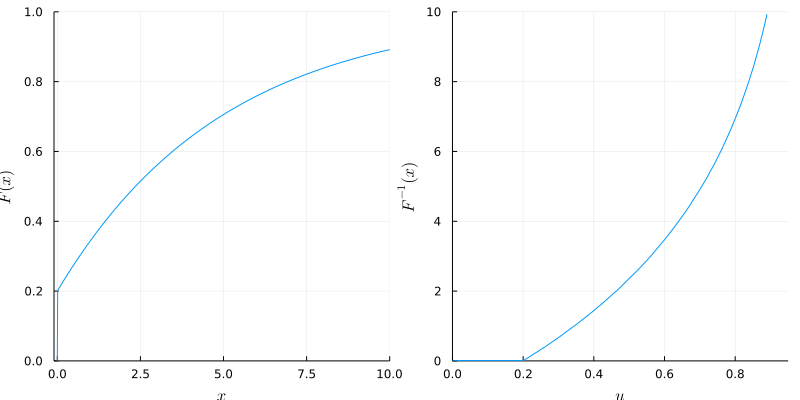

In [3]:
using Plots, LaTeXStrings

xGrid = 0:0.01:10
uGrid = 0:0.01:1
busy = 0.8

F(t) = t<=0 ? 0 : 1 - busy*exp(-(1-busy)t)

infimum(B) = isempty(B) ? Inf : minimum(B)
invF(u) = infimum(filter(x -> F(x) >= u, xGrid))

p1 = plot(xGrid, F.(xGrid), xlims=(-0.1, 10), ylims=(0,1),
    xlabel=L"x", ylabel=L"F(x)")

p2 = plot(uGrid, invF.(uGrid), xlims=(0,0.95), ylims=(0, maximum(xGrid)), 
    xlabel=L"u", ylabel=L"F^{-1}(x)")

plot(p1, p2, legend=:none, size=(800,400))

## Integral Transforms
- An ***integral tansform*** of a probability distribution is a representation of the distribution on a different domain.
- For a random variable $X$ and a real or complex fixed value $s$, consider the expectation, $\mathbb{E}[e^{sX}]$. When viewed as a function of $s$, this is the ***moment generating function***. We present this here for a continuous random variable with PDF $f(\cdot)$
$$
M(s) = \mathbb{E}[e^{sX}] = \int_{-\infty}^{\infty}f(x)e^{sx}dx
$$
- ***Example*** of application: Consider two distribuions with densities:
$$
\begin{array}{ll}
 f_{1}(x)=2x\quad  & \text{for } x\in[0,1],\\
 f_{2}(x)=2-2x\quad & \text{for } x\in[0,1].
\end{array}
$$
- where the respective random variables are denoted as $X_{1}$ and $X_{2}$. Computing the MGF of these distributions, we obtain:
$$
\begin{split}
& M_{1}(s) = \int_{0}^{1} 2xe^{sx}dx = 2 \frac{1+e^{s}(s-1)}{s^{2}},\\
& M_{2}(s) = \int_{0}^{1} (2-2x)e^{sx}dx = 2 \frac{e^{s} - 1 - s}{s^{2}}
\end{split}
$$
  - Define now a random variable, $Z=X_{1}+X_{2}$ where $X_{1}$ and $X_{2}$ are assumed independent. It is known that the MGF of $Z$ is the product of the MGFs of $X_{1}$ and $X_{2}$. That is
$$
M_{Z}(s) = M_{1}(s)M_{2}(s) = 4 \frac{\big(1+e^{s}(s-1)\big)\big(e^{s} - 1 - s\big)}{s^{4}}
$$
  - The new MGF $M_{Z}(\cdot)$ fully specifies the distribution of $Z$.
- A key property of any MGF $M(s)$ of a random variable $X$ is that
$$
\frac{d^{n}}{ds^{n}}M(s)\bigg|_{s=0} = \mathbb{E}[X^{n}]
$$
  - Hence to calculate the $n$-th moment, one can simply evaluate the derivative of the MGF at $s=0$.
- Estimate both the PDF and MGF of $Z$ by Julia.


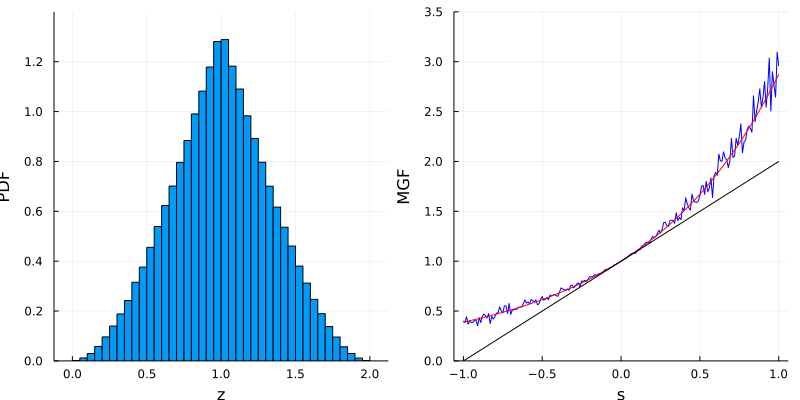

In [4]:
using Distributions, Statistics, Plots

dist1 = TriangularDist(0,1,1)
dist2 = TriangularDist(0,1,0)
N = 10^6

data1, data2 = rand(dist1,N), rand(dist2,N)
dataSum = data1 + data2

mgf(s) = 4(1 + (s-1)*MathConstants.e^s) * (MathConstants.e^s-1-s)/s^4

mgfPointEst(s) = mean([MathConstants.e^(s*z) for z in rand(dist1,20)+rand(dist2,20)])


p1 = histogram(dataSum, bins=80, normed=true,
    ylims=(0,1.4), xlabel="z", ylabel="PDF")

sGrid = -1:0.01:1
p2 = plot(sGrid, mgfPointEst.(sGrid), ylims=(0,3.5),c=:blue)
p2 = plot!(sGrid, mgf.(sGrid), c=:red)
p2 = plot!([minimum(sGrid), maximum(sGrid)],
    [minimum(sGrid), maximum(sGrid)] .+ 1,
    xlabel="s", ylabel="MGF",c=:black)

plot(p1,p2,legend=:none, size=(800,400))